In [ ]:
import requests
import pandas as pd

def request(condition, year):
  response = requests.get("https://clinicaltrials.gov/api/v2/studies?", params = {
      "format": "json",
      "query.cond": condition,
      "query.locn": "United States",
      "postFilter.overallStatus": ["COMPLETED"],
      "fields": ["BaselineMeasure"],
      "postFilter.advanced": f"AREA[StartDate]{year}",
      "pageSize": 100
    })

  return response


In [ ]:
from os import curdir

#Depression Datasets
depression = pd.DataFrame()

for i in range(2010, 2011):
  curr = request("Depression", i)

  curr = curr.json()
  curr = curr['studies']
  curr = [entry for entry in curr if entry] #get rid of trials without demographic results

  diversity = []
  for results_section in curr:
    if 'resultsSection' in results_section and 'baselineCharacteristicsModule' in results_section['resultsSection']:
      baseline_characteristics = results_section['resultsSection']['baselineCharacteristicsModule']
      #check if baselineCharacteristics contains measures
      if 'measures' in baseline_characteristics:
        #loop through each one
        for measure in baseline_characteristics['measures']:
          #Check if the measure is about "Race/Ethnicity Customized"
         if measure.get('title') == 'Race/Ethnicity, Customized':
            #Extract relevant data
           diversity.append({'classes': measure['classes']})


  race_counts = {}
  # Iterate through race/ethnicity data and accumulate counts
  for entry in diversity:
    classes = entry.get('classes', [])
    for class_entry in classes:
        title = class_entry.get('title', 'Unknown')
        categories = class_entry.get('categories', [])
        total_count = 0
        for category in categories:
            measurements = category.get('measurements', [])
            for measurement in measurements:
                value = int(measurement.get('value', '0'))
                total_count += value
        race_counts[title] = race_counts.get(title, 0) + total_count

  race_counts["Year"] = i
  depression = depression.append(race_counts, ignore_index=True)







<ipython-input-153-a57c92bab3f3>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  depression = depression.append(race_counts, ignore_index=True)


In [ ]:
depression


,"Caucasian (White, including Hispanic)",Black,Asian,American Indian or Alaska Native,White,Native Hawaiian or other Pacific Islander,Other,European descent,Asian descent,Latino descent,...,Multiple,Native Hawaiian or Other Pacific Islander,Race,"Caucasian (or White, including Hispanic)",More than 1 race,African-American,Caucasian,Hispanic,Year,Native
0,1342,1350,564,26,2460,4,52,44,12,8,...,4,4,184,940,4,66,68,12,2010,8


In [ ]:
depression['White'] = depression['Caucasian (White, including Hispanic)'] + depression['White'] + depression['Caucasian (or White, including Hispanic)']
del depression['Caucasian (White, including Hispanic)']
del depression['Caucasian (or White, including Hispanic)']

In [ ]:
depression['Native'] = depression['Native'] + depression['American Indian or Alaska Native']
del depression['American Indian or Alaska Native']
del depression['Native Hawaiian or Other Pacific Islander']
del depression['Native Hawaiian or other Pacific Islander']

In [ ]:
del depression['Race']
del depression['Year']
depression['White'] = depression['White'] + depression['Caucasian']
del depression['Caucasian']
depression['Asian'] = depression['Asian descent']
del depression['Asian descent']
depression['Black'] = depression['Black'] + depression['African descent']
del depression['African descent']
depression['White'] = depression['White'] + depression['European descent']
del depression['European descent']
depression['Hispanic'] = depression['Hispanic'] + depression['Latino descent']
del depression['Latino descent']
depression['Multiple'] = depression['More than 1 race'] + depression['Multiple'] + depression['Multi-ethnic descent']
del depression['Multi-ethnic descent']
del depression['More than 1 race']

In [ ]:
depression['Black'] = depression['Black'] + depression['African-American']
del depression['African-American']

([<matplotlib.patches.Wedge at 0x78e0e850d3f0>,
 [Text(-0.7062398128202279, 0.8433417615579402, 'Black'),
  Text(-1.08402937209791, 0.18676273833131576, 'Asian'),
  Text(0.6606175232241547, -0.8795365188604642, 'White'),
  Text(0.1012424583704193, 1.0953309840514482, 'Other'),
  Text(0.06575377205865186, 1.0980329874188932, 'Multiple'),
  Text(0.04744250975096699, 1.0989764366302535, 'Hispanic'),
  Text(0.01833487618837713, 1.0998471858922751, 'Native')],
 [Text(-0.3852217160837606, 0.4600045972134218, '22.2%'),
  Text(-0.5912887484170417, 0.10187058454435403, '0.2%'),
  Text(0.3603368308495389, -0.4797471921057077, '75.7%'),
  Text(0.055223159111137794, 0.5974532640280626, '0.8%'),
  Text(0.03586569385017374, 0.598927084046669, '0.2%'),
  Text(0.025877732591436536, 0.599441692707411, '0.3%'),
  Text(0.010000841557296615, 0.5999166468503319, '0.5%')])

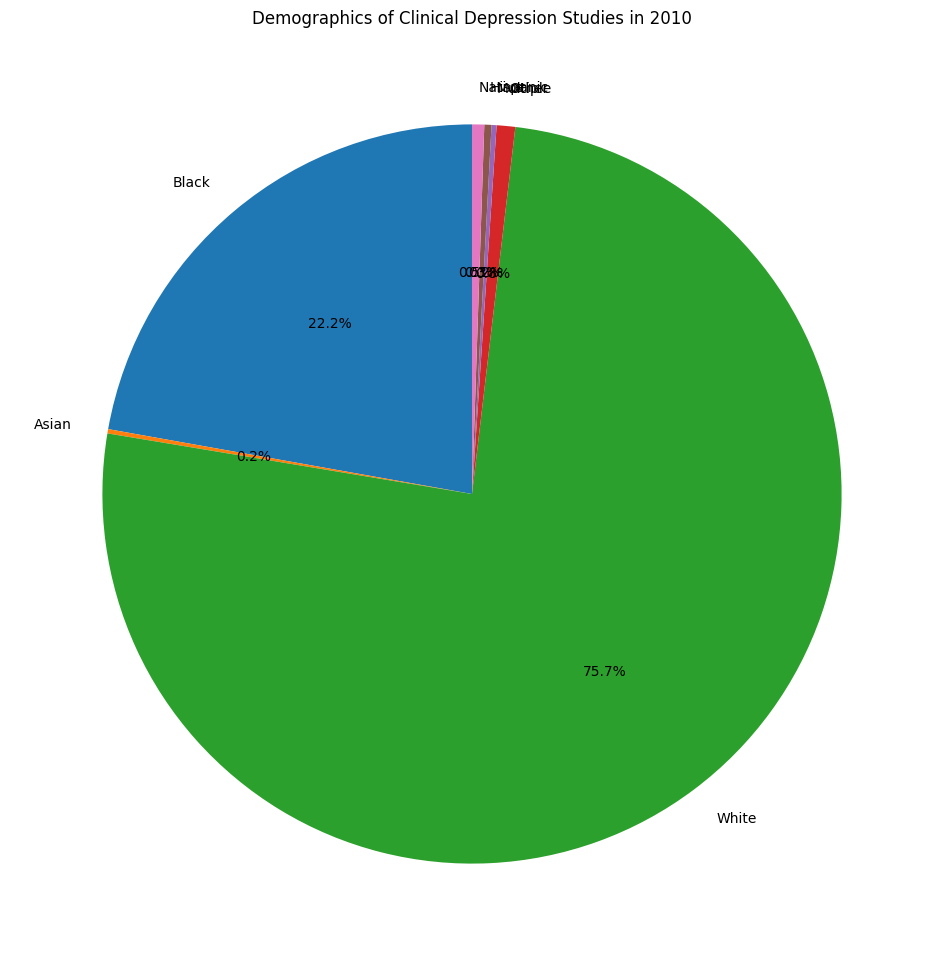

In [ ]:
#Make pie chart
import matplotlib.pyplot as plt
data_transposed = depression.transpose()

data_transposed.columns = ['Values']

plt.figure(figsize=(12,12))
plt.title("Demographics of Clinical Depression Studies in 2010")
plt.pie(data_transposed['Values'], labels = data_transposed.index, autopct='%1.1f%%', startangle=90)

In [ ]:
from os import curdir

#Diabetes
diabetes = pd.DataFrame()

for i in range(2021, 2022):
  curr = request("Diabetes", i)

  curr = curr.json()
  curr = curr['studies']
  curr = [entry for entry in curr if entry] #get rid of trials without demographic results

  diversity = []
  for results_section in curr:
    if 'resultsSection' in results_section and 'baselineCharacteristicsModule' in results_section['resultsSection']:
      baseline_characteristics = results_section['resultsSection']['baselineCharacteristicsModule']
      #check if baselineCharacteristics contains measures
      if 'measures' in baseline_characteristics:
        #loop through each one
        for measure in baseline_characteristics['measures']:
          #Check if the measure is about "Race/Ethnicity Customized"
         if measure.get('title') == 'Race/Ethnicity, Customized':
            #Extract relevant data
           diversity.append({'classes': measure['classes']})


  race_counts = {}
  # Iterate through race/ethnicity data and accumulate counts
  for entry in diversity:
    classes = entry.get('classes', [])
    for class_entry in classes:
        title = class_entry.get('title', 'Unknown')
        categories = class_entry.get('categories', [])
        total_count = 0
        for category in categories:
            measurements = category.get('measurements', [])
            for measurement in measurements:
                value = int(measurement.get('value', '0'))
                total_count += value
        race_counts[title] = race_counts.get(title, 0) + total_count

  race_counts["Year"] = i
  diabetes = diabetes.append(race_counts, ignore_index=True)


<ipython-input-204-d77ce82fe2eb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  diabetes = diabetes.append(race_counts, ignore_index=True)


In [ ]:
del diabetes['Not Hispanic or Latino']
del diabetes['Non-Hispanic Black']
del diabetes['Non-Hispanic White']
diabetes['White'] = diabetes['White'] + diabetes['White or Caucasian']
del diabetes['White or Caucasian']
del diabetes['Race/Ethnicity']
del diabetes['Year']

In [ ]:
diabetes

,White,Black or African American,Asian,Not reported,Hispanic or Latino,Hispanic,Other,Black,American Indian / Alaska Native,More than one race,Unknown
0,312,61,26,2,166,20,6,21,1,2,204


In [ ]:
diabetes['Unknown'] = diabetes['Not reported'] + diabetes['Unknown']
del diabetes['Unknown']
del diabetes['Not reported']

In [ ]:
del diabetes['Hispanic']
diabetes['Black'] = diabetes['Black or African American'] + diabetes['Black']
del diabetes['Black or African American']

In [ ]:
diabetes

,White,Asian,Hispanic or Latino,Other,Black,American Indian / Alaska Native,More than one race
0,312,26,166,6,82,1,2


([<matplotlib.patches.Wedge at 0x78e0f2939360>,
 [Text(-1.0967777934501155, -0.08413365435244015, 'White'),
  Text(0.31496852548057436, -1.0539425164384408, 'Asian'),
  Text(1.061128085604999, -0.2898399315834005, 'Hispanic or Latino'),
  Text(0.8813066144665099, 0.6582542451800661, 'Other'),
  Text(0.4929097416391755, 0.983381912888986, 'Black'),
  Text(0.029036215780725756, 1.0996167051173493, 'American Indian / Alaska Native'),
  Text(0.011615413514268626, 1.0999386720035316, 'More than one race')],
 [Text(-0.598242432790972, -0.04589108419224008, '52.4%'),
  Text(0.1718010138984951, -0.5748777362391494, '4.4%'),
  Text(0.5787971376027267, -0.15809450813640025, '27.9%'),
  Text(0.48071269879991446, 0.35904777009821787, '1.0%'),
  Text(0.26885985907591387, 0.5363901343030832, '13.8%'),
  Text(0.015837935880395865, 0.5997909300640086, '0.2%'),
  Text(0.006335680098691977, 0.5999665483655626, '0.3%')])

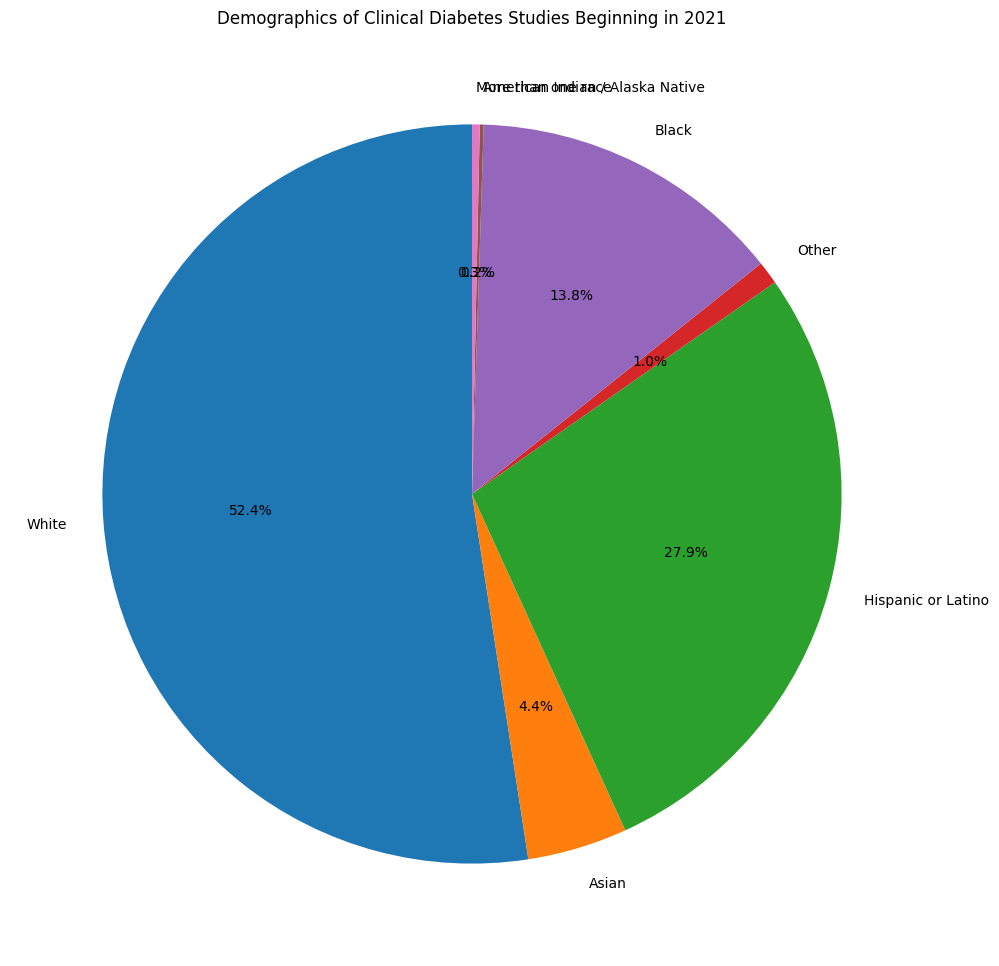

In [ ]:
#Make pie chart
import matplotlib.pyplot as plt
data_transposed = diabetes.transpose()

data_transposed.columns = ['Values']

plt.figure(figsize=(12,12))
plt.title("Demographics of Clinical Diabetes Studies Beginning in 2021")
plt.pie(data_transposed['Values'], labels = data_transposed.index, autopct='%1.1f%%', startangle=90)